In [ ]:
!pip install qiskit pylatexenc

In [2]:
from qiskit import QuantumCircuit

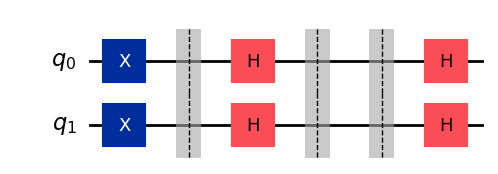

In [10]:
notiger = QuantumCircuit(2)
notiger.x(0)
notiger.x(1)
notiger.barrier()
notiger.h(0)
notiger.h(1)
notiger.barrier()
# oracle is empty
notiger.barrier()
notiger.h(0)
notiger.h(1)
notiger.draw(output='mpl')

In [11]:
from qiskit.quantum_info import Statevector
a = Statevector.from_instruction(notiger)
a.draw('latex')

<IPython.core.display.Latex object>

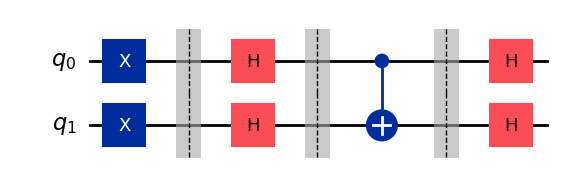

In [21]:
blacktiger = QuantumCircuit(2)
# set up the inputs to be |11> (black black)
blacktiger.x(0)
blacktiger.x(1)
blacktiger.barrier()
# add hadamards
blacktiger.h(0)
blacktiger.h(1)
blacktiger.barrier()
# add the oracle
blacktiger.cx(0, 1)
blacktiger.barrier()
blacktiger.h(0)
blacktiger.h(1)
blacktiger.draw(output='mpl')

In [22]:
from qiskit.quantum_info import Statevector
a = Statevector.from_instruction(blacktiger)
a.draw('latex')

<IPython.core.display.Latex object>

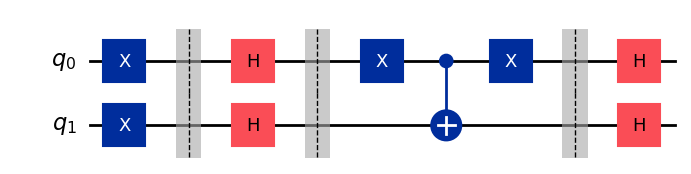

In [23]:
whitetiger = QuantumCircuit(2)
# set up the inputs to be |11> (black black)
whitetiger.x(0)
whitetiger.x(1)
whitetiger.barrier()
# add hadamards
whitetiger.h(0)
whitetiger.h(1)
whitetiger.barrier()
# add the oracle
whitetiger.x(0)
whitetiger.cx(0, 1)
whitetiger.x(0)
whitetiger.barrier()
# end of oracle, now add trailing hadamards
whitetiger.h(0)
whitetiger.h(1)
whitetiger.draw(output='mpl')

In [24]:
from qiskit.quantum_info import Statevector
a = Statevector.from_instruction(whitetiger)
a.draw('latex')

<IPython.core.display.Latex object>

In [25]:
# add measurement
whitetiger.measure_all()

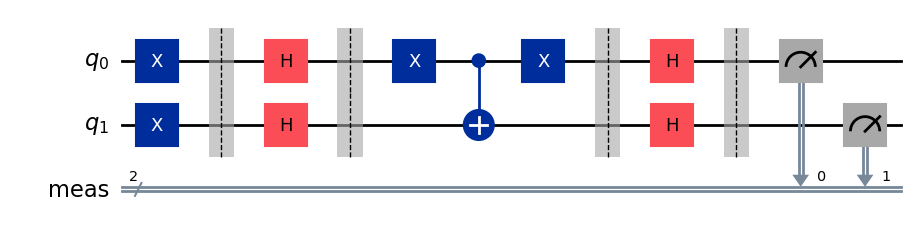

In [26]:
whitetiger.draw(output='mpl')

In [ ]:
!pip install qiskit-aer

In [33]:
from qiskit_aer import AerSimulator
aersim = AerSimulator()
# transpile not needed

In [34]:
result = aersim.run(whitetiger).result()
counts = result.get_counts(whitetiger)
print(result.get_counts(whitetiger))

{'10': 1024}


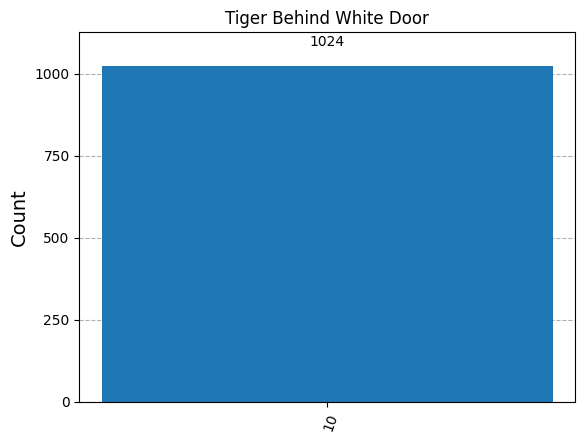

In [35]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, title='Tiger Behind White Door')

In [ ]:
# the point was to show the phase does not appear in the measurements